In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import class_weight

import glob
import imageio as img

#provided method
def load_dataset(path):
    print('Loading Dataset...')
    train_x, train_y, test_x, test_y = [], [], [], []

    for i in range(10):
        for filename in glob.glob(path + '//train//' + str(i)+'//*.png'):
            im = img.imread(filename)
            train_x.append(im)
            train_y.append(i)

        for filename in glob.glob(path + '//test//' + str(i)+'//*.png'):
            im = img.imread(filename)
            test_x.append(im)
            test_y.append(i)

    print('Dataset loaded...')
    return np.array(train_x), np.array(train_y), np.array(test_x), np.array(test_y)

# Load the dataset
path_to_dataset = "MNIST_Imbalanced_Dataset"
train_set_x, train_set_y, test_set_x, test_set_y = load_dataset(path_to_dataset)
"""train_set_x and test_set_x are numpy arrays of shape 
(n_Samples, num_px, num_px, 1), where n_Samples is number of 
train/test images, and num_px is the width and height of images that is 28 in 
case of MNIST. 
*_set_x : is being used for the samples, 
*_set_y : is being used for the labels."""

Loading Dataset...


/var/folders/jg/dgngvf617h3_hnfg_zxxdh8c0000gn/T/ipykernel_8104/2660231368.py:15: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = img.imread(filename)
/var/folders/jg/dgngvf617h3_hnfg_zxxdh8c0000gn/T/ipykernel_8104/2660231368.py:20: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = img.imread(filename)


Dataset loaded...


'train_set_x and test_set_x are numpy arrays of shape \n(n_Samples, num_px, num_px, 1), where n_Samples is number of \ntrain/test images, and num_px is the width and height of images that is 28 in \ncase of MNIST. \n*_set_x : is being used for the samples, \n*_set_y : is being used for the labels.'

In [11]:
#Resise the images for numpy, array with a shape of (n,) is treated as a 1-dimensional array
train_set_y = train_set_y.reshape(-1, 1)
test_set_y = test_set_y.reshape(-1, 1)

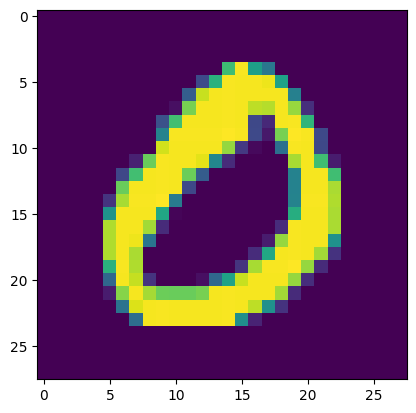

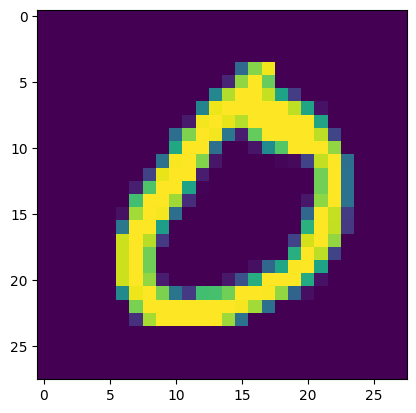

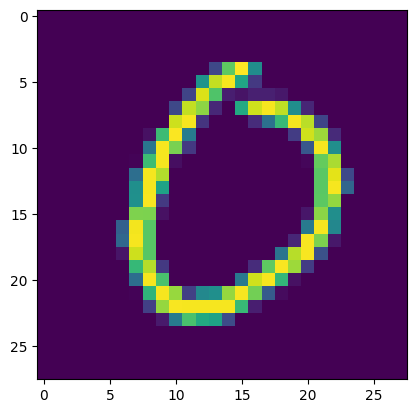

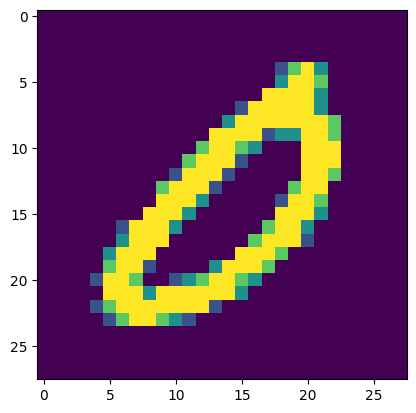

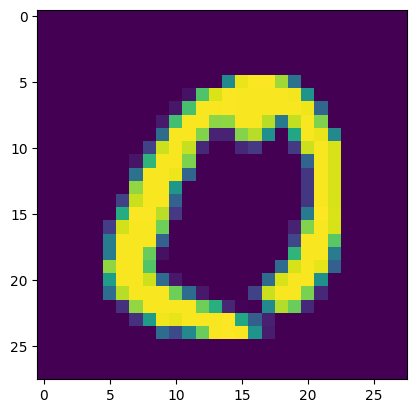

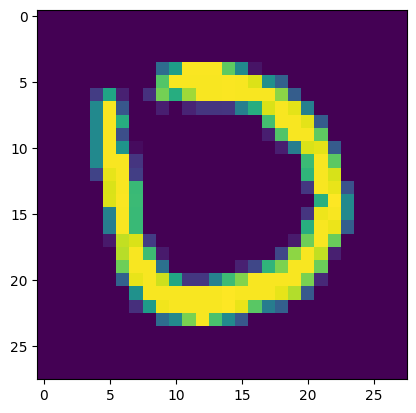

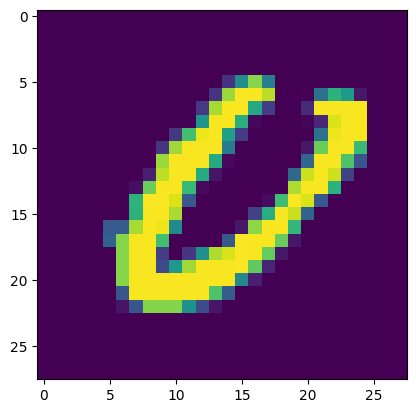

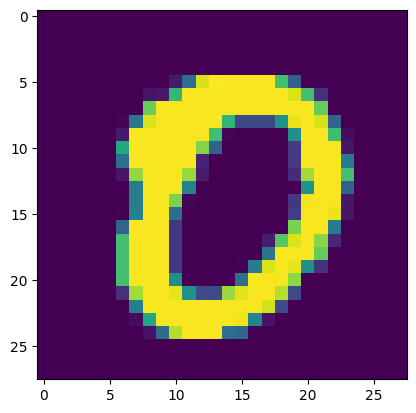

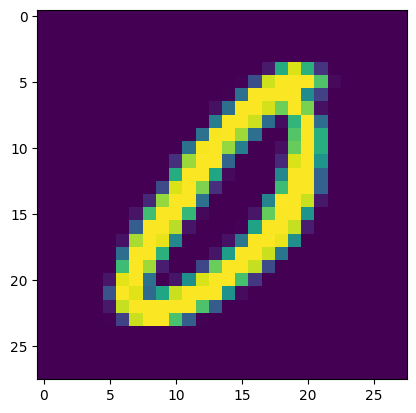

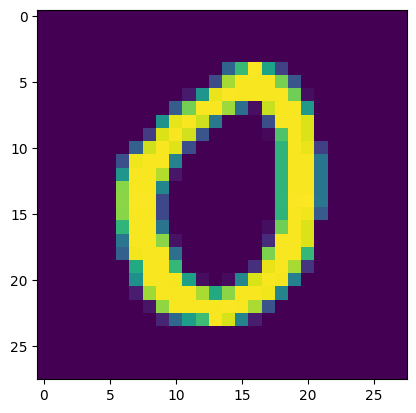

In [12]:
#test
index = 28
#plt.imshow(train_set_x[index])
for i in range(10):
    plt.imshow(train_set_x[i])
    plt.pause(0.5)

In [13]:
#One hot encoding for labels
def one_hot_encode(labels, num_classes):
    num_samples = labels.shape[0]
    onehot = np.zeros((num_samples, num_classes))
    onehot[np.arange(num_samples), labels] = 1
    return onehot

num_classes = 10

train_set_y_onehot = one_hot_encode(train_set_y, num_classes)
test_set_y_onehot = one_hot_encode(test_set_y, num_classes)

In [14]:
#verify that all the data is loaded
print("train_set_x shape:", train_set_x.shape)
print("test_set_x shape:", test_set_x.shape)
print("train_set_y shape:", train_set_y.shape)
print("test_set_y shape:", test_set_y.shape)

train_set_x shape: (43470, 28, 28)
test_set_x shape: (10000, 28, 28)
train_set_y shape: (43470, 1)
test_set_y shape: (10000, 1)


In [15]:
# Create a Neural_Network class *imported from task2
from scipy.signal import convolve2d
from skimage.measure import block_reduce
class Neural_Network(object):        
    def __init__(self,inputSize = 2, outputSize = 1 ):        
        # size of layers
        self.inputSize = inputSize
        self.outputSize = outputSize 
        self.num_filters = 36
        self.filter_size = 5
        self.pool_size = 2
        self.pool_stride = 2
        conv_output_height = (self.inputSize - self.filter_size) // self.pool_stride + 1
        conv_output_width = (self.inputSize - self.filter_size) // self.pool_stride + 1
        pooled_output_height = (conv_output_height - self.pool_size) // self.pool_stride + 1
        pooled_output_width = (conv_output_width - self.pool_size) // self.pool_stride + 1
        
        # Calculate the total number of elements in the flattened feature maps
        self.hiddenLayer = self.num_filters * pooled_output_height * pooled_output_width
        
        #weights
        self.W1 = np.random.randn(self.inputSize, self.hiddenLayer) # randomly initialize W1 using random function of numpy
        self.b1 = np.zeros((1, self.hiddenLayer))
        # size of the wieght will be (inputSize +1, hiddenlayer) that +1 is for bias    
        self.W2 = np.random.randn(self.hiddenLayer, self.outputSize) # randomly initialize W2 using random function of numpy
        # size of the wieght will be (hiddenlayer +1, outputSize) that +1 is for bias    
        self.b2 = np.zeros((1, self.outputSize))
        self.activation = 'sigmoid'

        

        
    def feedforward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        if self.activation == 'sigmoid':
            self.a1 = self.sigmoid(self.z1) # running this for most cases
        elif self.activation == 'tanh':
            self.a1 = self.tanh(self.z1)
        elif self.activation == 'relu':
            self.a1 = self.relu(self.z1)

        self.z2 = np.dot(self.a1, self.W2) + self.b2 # modified with adding (0 ~ output size arrays)
        y_pred = self.sigmoid(self.z2)
        return y_pred

    def sigmoid(self, s):
        # activation function
        return (1 / (1 + np.exp(-s))) # apply sigmoid function on s and return it's value

    def sigmoid_derivative(self, s):
        #derivative of sigmoid
        return s * (1 - s) # apply derivative of sigmoid on s and return it's value 
    
    def tanh(self, s):
        # activation function
        return np.tanh(s) # apply tanh function on s and return it's value

    def tanh_derivative(self, s):
        #derivative of tanh
        return 1 - np.tanh(s) ** 2 # apply derivative of tanh on s and return it's value
    
    def relu(self, s):
        # activation function
        return np.maximum(0, s) # apply relu function on s and return it's value

    def relu_derivative(self, s):
        #derivative of relu
        s[s <= 0] = 0
        s[s > 0] = 1
        return s # apply derivative of relu on s and return it's value

    def backwardpropagate(self, X, Y, y_pred, lr):
        # Calculate the error in the output layer
        delta2 = (Y - y_pred) * self.sigmoid_derivative(y_pred)

        # Calculate the gradient for the second layer (W2)
        dW2 = np.dot(self.a1.T, delta2)
        db2 = np.sum(delta2, axis=0, keepdims=True)

        # Calculate the error in the first layer
        delta1 = np.dot(delta2, self.W2.T) * self.sigmoid_derivative(self.a1)

        # Calculate the gradient for the first layer (W1)
        dW1 = np.dot(X.T, delta1)
        db1 = np.sum(delta1, axis=0, keepdims=True)

        # Update weights and biases for the second layer
        self.W2 += lr * dW2
        self.b2 += lr * db2

        # Update weights and biases for the first layer
        self.W1 += lr * dW1
        self.b1 += lr * db1



    def crossentropy(self, Y, Y_pred):
        # compute error based on crossentropy loss 
        epsilon = 1e-15
        Y_pred = np.clip(Y_pred, epsilon, 1 - epsilon)
        error = - (Y * np.log(Y_pred) + (1 - Y) * np.log(1 - Y_pred))
        return np.mean(error) #error

    def train(self, trainX, trainY,epochs = 100, learningRate = 0.001, plot_err = True ,validationX = None, validationY = None):
        # feed forward trainX and trainY and recivce predicted value
        # backpropagation with trainX, trainY, predicted value and learning rate.
        # if validationX and validationY are not null than show validation accuracy and error of the model by printing values.
        # plot error of the model if plot_err is true
        train_loss = []
        valid_loss = []

        for epoch in range(epochs):
            # Forward pass
            y_pred = self.feedforward(trainX)

            # Compute and store the training loss
            loss = self.crossentropy(trainY, y_pred)
            train_loss.append(loss)

            # Backpropagation and weight update
            self.backwardpropagate(trainX, trainY, y_pred, learningRate)

            # Validation loss
            if validationX is not None and validationY is not None:
                y_valid_pred = self.feedforward(validationX)
                valid_loss.append(self.crossentropy(validationY, y_valid_pred))

        if plot_err:
            plt.plot(range(epochs), train_loss, label='Training Loss')
            if validationX is not None and validationY is not None:
                plt.plot(range(epochs), valid_loss, label='Validation Loss')
            plt.xlabel('Epochs')
            plt.ylabel('Cross-Entropy Loss')
            plt.legend()
            plt.show()

    def predict(self, testX):
        # predict the value of testX
        return self.feedforward(testX)
    
    def accuracy(self, testX, testY):
        # predict the value of trainX
        # compare it with testY
        # compute accuracy, print it and show in the form of picture
        y_pred = self.feedforward(testX)
        y_pred = np.round(y_pred)
        accuracy = np.mean(y_pred == testY)
        return accuracy # return accuracy    
        
    def saveModel(self,name):
        # save your trained model, it is your interpretation how, which and what data you store
        # which you will use later for prediction
        model_data = {
            'inputSize': self.inputSize,
            'outputSize': self.outputSize,
            'hiddenLayer': self.hiddenLayer,
            'activation': self.activation,
            'W1': self.W1,
            'W2': self.W2
        }
        np.save(name, model_data)
        
    def loadModel(self,name):
        # load your trained model, load exactly how you stored it.
        model_data = np.load(name, allow_pickle=True)
        self.inputSize = model_data.item().get('inputSize')
        self.outputSize = model_data.item().get('outputSize')
        self.hiddenLayer = model_data.item().get('hiddenLayer')
        self.activation = model_data.item().get('activation')
        self.W1 = model_data.item().get('W1')
        self.W2 = model_data.item().get('W2')

    def apply_convolution(self, image, filter):
        return convolve2d(image, filter, mode='valid')

    
    def conv_forward(self, input_data, filters):
        feature_maps = []
        for image in input_data:
            image_maps = []
            for filter in filters:
                feature_map = self.apply_convolution(image, filter)
                image_maps.append(feature_map)
            feature_maps.append(image_maps)
        feature_maps = np.array(feature_maps)  # Convert the list of feature maps to a NumPy array
        return feature_maps

    
    #def pool_forward(self, feature_maps, pool_size, stride):
        # Implement max pooling
        #pooled_maps = []
        #for img_feature_maps in feature_maps:
        #    img_pooled_maps = []
        #    for feature_map in img_feature_maps:
        #        pooled_map = block_reduce(feature_map, (pool_size, pool_size), func=np.max)
        #        img_pooled_maps.append(pooled_map)
        #    pooled_maps.append(img_pooled_maps)
        #return pooled_maps
            # Implement max pooling
        #pooled_maps = []
        #for feature_map in feature_maps:
        ##    feature_map = np.array(feature_map)  # Convert list of arrays to NumPy array
        #    pooled_map = block_reduce(feature_map, (pool_size, pool_size), func=np.max)
        #   pooled_maps.append(pooled_map)
        #return pooled_maps
    def pool_forward(self, feature_maps, pool_size, stride):
        pooled_maps = []
        for feature_map in feature_maps:
            pool_height, pool_width = pool_size, pool_size
            stride_vertical, stride_horizontal = stride, stride
            
            # Calculate the output dimensions
            output_height = (np.shape(feature_map)[0] - pool_height) // stride_vertical + 1
            output_width = (np.shape(feature_map)[1] - pool_width) // stride_horizontal + 1
            
            pooled_map = np.zeros((output_height, output_width, np.shape(feature_map)[2]))
            
            # Apply max pooling using slicing
            for i in range(output_height):
                for j in range(output_width):
                    vertical_start = i * stride_vertical
                    vertical_end = vertical_start + pool_height
                    horizontal_start = j * stride_horizontal
                    horizontal_end = horizontal_start + pool_width
                    
                    pooled_map[i, j, :] = np.max(feature_map[vertical_start:vertical_end, horizontal_start:horizontal_end], axis=(0, 1))
            
            pooled_maps.append(pooled_map)
        return pooled_maps




    
    def flatten(self, pooled_maps):
        # Flatten the pooled feature maps for fully connected layers
        flattened = [pooled_map.flatten() for pooled_map in pooled_maps]
        return np.vstack(flattened)

    def train_cnn(self, train_set_x, train_set_y, test_set_x, test_set_y, epochs=100, learning_rate=0.001, plot_err=True):
        # Load and distribute your dataset
        trainX = train_set_x
        trainY = train_set_y
        testX = test_set_x
        testY = test_set_y
        
        # CNN Hyperparameters
        num_filters = 36
        filter_size = 5
        pool_size = 2
        pool_stride = 2
        
        # Initialize filters randomly
        filters = [np.random.randn(filter_size, filter_size) for _ in range(num_filters)]
        
        train_loss = []
        
        for epoch in range(epochs):
            # Forward pass: Convolution and Max Pooling
            conv_feature_maps = self.conv_forward(trainX, filters)
            pooled_maps = self.pool_forward(conv_feature_maps, pool_size, pool_stride)
            flattened = self.flatten(pooled_maps)
            
            # Feedforward through fully connected layers
            y_pred = self.feedforward(flattened)
            
            # Compute and store training loss
            loss = self.crossentropy(trainY, y_pred)
            train_loss.append(loss)
            
            # Backpropagation and weight update
            self.backwardpropagate(flattened, trainY, y_pred, learning_rate)
            
        if plot_err:
            plt.plot(range(epochs), train_loss, label='Training Loss')
            plt.xlabel('Epochs')
            plt.ylabel('Cross-Entropy Loss')
            plt.legend()
            plt.show()


In [16]:
hidden_layer_size = 5184
model = Neural_Network(inputSize=train_set_x.shape[1] * train_set_x.shape[2], outputSize=1)



: 

: 

In [ ]:
model.train_cnn(train_set_x, train_set_y, test_set_x, test_set_y, epochs=5, learning_rate=0.001)


#Initialize filters
num_filters = 36
filter_size = 3
filters = np.random.randn(num_filters, filter_size, filter_size)


In [ ]:
from scipy.signal import convolve2d
def apply_convolution(image, filter):
    return convolve2d(image, filter, mode='valid')

In [ ]:
# Apply Max-Pooling Operation
def pool_forward(feature_map, filter_size=2, stride=2):
    output_dim = (feature_map.shape[0] - filter_size) // stride + 1
    pooled = np.zeros((output_dim, output_dim))
    for i in range(0, feature_map.shape[0] - filter_size + 1, stride):
        for j in range(0, feature_map.shape[1] - filter_size + 1, stride):
            pool_slice = feature_map[i:i + filter_size, j:j + filter_size]
            pooled[i // stride, j // stride] = np.max(pool_slice)
    return pooled

In [ ]:
# Create an instance of your Neural Network
nn = Neural_Network(inputSize=12*12*num_filters, hiddenlayer=128, outputSize=10)


In [ ]:
# Split training data into training and validation sets
from sklearn.model_selection import train_test_split
#for focal loss function
validation_size = 0.2  # You can adjust the validation size
trainX, validationX, trainY, validationY = train_test_split(
    train_set_x, train_set_y_onehot, test_size=validation_size, random_state=42
)

In [ ]:
# Assuming you have loaded the MNIST dataset and initialized your neural network

# Hyperparameters
epochs = 50
learning_rate = 0.001
decay_epochs = 10
learning_rate_decay = 0.1

# Training loop
for epoch in range(epochs):
    total_loss = 0.0
    
    # Iterate over training samples
    for i in range(len(trainX)):
        # Forward pass
        feature_map = apply_convolution(trainX[i], filters)
        pooled_map = pool_forward(feature_map)
        flattened_features = pooled_map.flatten()
        y_pred = nn.feedforward(flattened_features)
        
        # Compute loss and total loss
        loss = nn.crossentropy(trainY[i], y_pred)
        total_loss += loss
        
        # Backpropagation
        nn.backwardpropagate(flattened_features, trainY[i], y_pred, learning_rate)
    
    # Calculate average loss for the epoch
    average_loss = total_loss / len(trainX)
    
    # Print progress
    print(f"Epoch [{epoch+1}/{epochs}] - Loss: {average_loss}")
    
    # Validation
    if validationX is not None and validationY is not None:
        validation_accuracy = nn.accuracy(validationX, validationY)
        print(f"Validation Accuracy: {validation_accuracy}")
    
    # Learning rate decay (if applicable)
    if (epoch + 1) % decay_epochs == 0:
        learning_rate *= learning_rate_decay
    
# Final evaluation on test set
test_accuracy = nn.accuracy(testX, testY)
print(f"Test Accuracy: {test_accuracy}")

In [ ]:
# Flatten the 3D volume to a 1D vector
def flatten_volume(volume):
    return volume.reshape(-1)

# Feed this 1D vector to your neural network from Task 2 for further processing
# Perform forward propagation using your Task 2 code
# Calculate loss using Focal Loss (you will need to implement this)
# Perform backpropagation to update the weights of the neural network
# Perform early stopping and learning rate decay for better training
# Continue the training for 2 epochs as mentioned in the prompt
